In [12]:
#import the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration:

In [13]:
#loading the dataset
df= pd.read_csv("dataset_full.csv")

In [14]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


The dataset contains 88,647 entries and 112 features, each potentially playing a role in distinguishing between real and phishing domains. Here's a breakdown of the features:

Numerical Features: Most features are numerical, including binary values (like tls_ssl_certificate), counts (like qty_dot_url), and other quantitative metrics.
Target Variable (phishing): This binary target indicates whether the domain is real (0) or phishing (1).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [16]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


## Data Cleaning:

In [17]:
#Check for missing values and duplicate rows in the dataset
missing_values= df.isnull().sum().sum()
duplicates= df.duplicated().sum()
missing_values, duplicates

(0, 1438)

In [18]:
#remove duplicate rows
df_cleaned= df.drop_duplicates()

#Confirm the removal

df_cleaned.shape[0]

87209

## EDA Steps:
Distribution of the Target Variable: Understanding the balance between real and malicious domains.

**Summary Statistics:** For selected URL-based, domain-based, page-based, and content-based features.

**Correlations:** Identify which features are strongly correlated with the phishing outcome.

**Visual Exploration:**
Histograms or box plots for feature distributions.
Scatter plots or correlation matrices to visualize relationships.

Let's start by examining the distribution of the target variable phishing and some key features.

/var/folders/pm/kzqry9g93x1023jn46jpt8z80000gn/T/ipykernel_48040/587582272.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['url_length']= df_cleaned.apply(lambda row: len(str(row)), axis=1)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


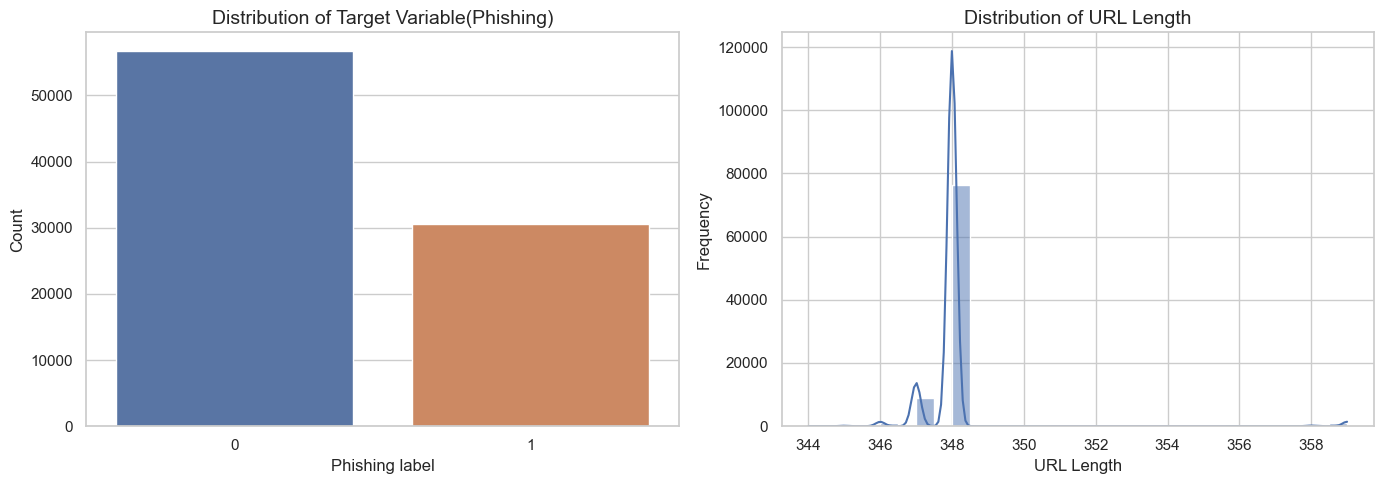

In [19]:
#setting the aesthetic style of the target variable
sns.set(style="whitegrid")

#Distribution of the target variable
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.countplot(x='phishing', data= df_cleaned, ax=ax[0])
ax[0].set_title('Distribution of Target Variable(Phishing)', fontsize=14)
ax[0].set_xlabel('Phishing label', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)


#histogram of URL length(we need to calculate this if not directly available)
df_cleaned['url_length']= df_cleaned.apply(lambda row: len(str(row)), axis=1)
sns.histplot(df_cleaned['url_length'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of URL Length', fontsize=14)
ax[1].set_xlabel('URL Length', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


## Feature Engineering
#### We'll focus on extracting four types of features:

**URL-Based Features:** Characteristics extracted directly from the URL, like the number of dots, hyphens, or specific characters.

**Domain-Based Features:** Information about the domain such as the number of DNS records, the existence of SSL certificates.

**Page-Based Features:** Properties related to the content and structure of the web page.

**Content-Based Features:** Elements within the content of the page like forms, input fields, and JavaScript code usage.

In [20]:
# Assume naming convention reflects the feature type, grouping features by their assumed categories
url_features = [col for col in df_cleaned.columns if 'url' in col]
domain_features = [col for col in df_cleaned.columns if 'domain' in col or 'dns' in col or 'ttl' in col or 'mx' in col or 'nameservers' in col]
page_features = [col for col in df_cleaned.columns if 'page' in col or 'content_length' in col or 'script' in col]
content_features = [col for col in df_cleaned.columns if 'content' in col and 'content_length' not in col]

# Print out the feature groups for confirmation
url_features, domain_features, page_features, content_features


(['qty_dot_url',
  'qty_hyphen_url',
  'qty_underline_url',
  'qty_slash_url',
  'qty_questionmark_url',
  'qty_equal_url',
  'qty_at_url',
  'qty_and_url',
  'qty_exclamation_url',
  'qty_space_url',
  'qty_tilde_url',
  'qty_comma_url',
  'qty_plus_url',
  'qty_asterisk_url',
  'qty_hashtag_url',
  'qty_dollar_url',
  'qty_percent_url',
  'qty_tld_url',
  'length_url',
  'email_in_url',
  'url_google_index',
  'url_shortened',
  'url_length'],
 ['qty_dot_domain',
  'qty_hyphen_domain',
  'qty_underline_domain',
  'qty_slash_domain',
  'qty_questionmark_domain',
  'qty_equal_domain',
  'qty_at_domain',
  'qty_and_domain',
  'qty_exclamation_domain',
  'qty_space_domain',
  'qty_tilde_domain',
  'qty_comma_domain',
  'qty_plus_domain',
  'qty_asterisk_domain',
  'qty_hashtag_domain',
  'qty_dollar_domain',
  'qty_percent_domain',
  'qty_vowels_domain',
  'domain_length',
  'domain_in_ip',
  'server_client_domain',
  'domain_spf',
  'time_domain_activation',
  'time_domain_expiration',


## URL-Based and Domain-Based Features:
**URL-Based Features:** These include various aspects of the URL structure, such as the number of specific characters (dots, hyphens, underscores, etc.), presence of an email in the URL, and whether the URL was shortened.

**Domain-Based Features:** These cover elements related to the domain such as the length, the presence of certain characters, and more technical aspects like the number of nameservers, MX servers, TTL of the hostname, and domain expiration information.

Feature Engineering for **Page-Based** and **Content-Based Features:** We need to further identify or create these features. If they aren't available, we might consider extracting such data if possible.

## Model Building
Now, let's build and train a few machine learning models to predict whether a domain is real or malicious. We'll test the following algorithms:

Logistic Regression: A baseline for binary classification tasks.
Random Forest: A robust ensemble method.
Gradient Boosting: An effective boosting method that can provide higher accuracy.
We will then evaluate these models based on their accuracy, precision, and recall.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df_cleaned.drop('phishing', axis=1)
y = df_cleaned['phishing']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the shapes of the resulting sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((69767, 112), (17442, 112), (69767,), (17442,))

In [26]:
'''
Here, I'll choose a Random Forest Classifier, which is effective 
for this type of classification task because of its robustness 
and ability to handle unbalanced data.

'''

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9689829148033482
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11364
           1       0.95      0.96      0.96      6078

    accuracy                           0.97     17442
   macro avg       0.97      0.97      0.97     17442
weighted avg       0.97      0.97      0.97     17442

